<a href="https://colab.research.google.com/github/pavstar619/ML_statistics_models/blob/master/simple_linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict profit of food truck with gradient descent

In [24]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
url = 'https://raw.githubusercontent.com/jdwittenauer/ipython-notebooks/master/data/ex1data1.txt'
df1 = pd.read_csv(url, header=None, names=['Population','Profit'])
df1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [26]:
df1.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


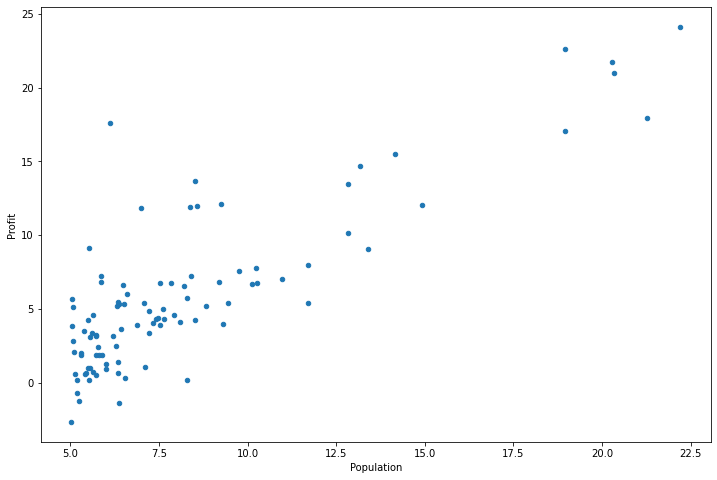

In [27]:
df1.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [28]:
def Cost(X, y, theta):
  inner = np.power(((X * theta.T)-y),2)
  return np.sum(inner) / (2 * len(X)) #eg (7-4)^2 =9 where 4 is given population and we predicted 7 so error of 3

In [29]:
df1.insert(0, 'Ones', 1) # add 1s column
df1

,Ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [30]:
cols = df1.shape[1]
X = df1.iloc[:, 0:cols-1]
y = df1.iloc[:, cols-1:cols] # set training data X and target var y

In [31]:
# convert from data frames to numpy matrix
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [32]:
X.shape, theta.shape, y.shape


((97, 2), (1, 2), (97, 1))

In [33]:
Cost(X, y, theta)

32.072733877455676

In [37]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = Cost(X, y, theta)
        
    return theta, cost

In [38]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [39]:
Cost(X, y, g)

4.515955503078912

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

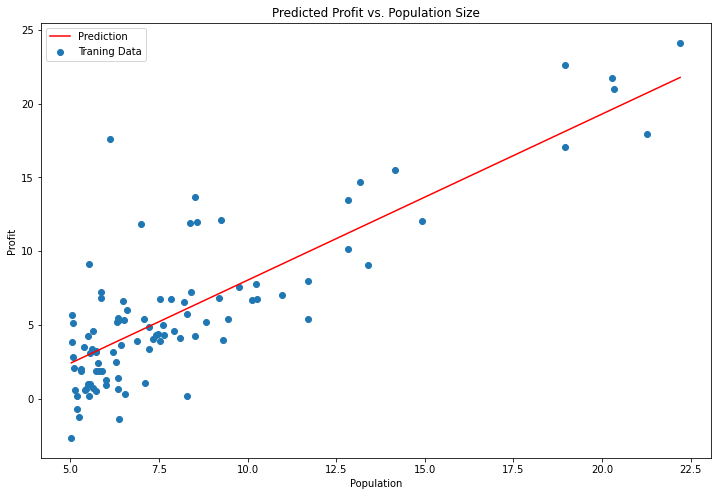

In [40]:
x = np.linspace(df1.Population.min(), df1.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df1.Population, df1.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

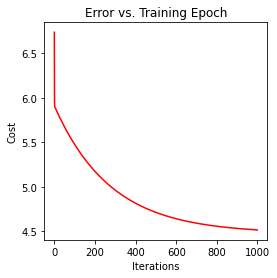

In [45]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')